In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# **문제 1**
### [다음 사이트](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)에서 Mall_Customer.csv 데이터를 다운 받아주세요!

#### 1.1 데이터를 로드하고 확인해주세요.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron 3기_DS/data/Week11/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 1.2 'CustomerID'는 군집 분석에 필요없는 변수이므로 삭제하겠습니다. 삭제한 후 데이터셋의 행, 열 수를 확인해주세요.

In [4]:
df.drop('CustomerID',axis = 1,inplace = True)
df.shape

# 200행 * 4열

(200, 4)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### 1.3 데이터셋 변수들의 정보를 확인해주세요.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#### 1.4 'Gender' 변수의 자료형이 object이므로 전처리가 필요할 것 같습니다. get_dummies를 이용해 원핫인코딩 진행 후 데이터셋을 확인해주세요.

In [7]:
df = pd.get_dummies(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


#### 1.5 데이터를 5개의 그룹으로 군집화해보겠습니다. n_cluster = 5, 초기 중심 설정 방식 : k-means++, 최대 반복 횟수 : 300으로 설정하여 KMeans 객체를 만든 후 fit( )을 수행해주세요.

In [8]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',max_iter = 300,random_state = 0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

#### 1.6 kmeans의 labels_ 속성값을 확인해보겠습니다.

In [9]:
print(kmeans.labels_)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


#### 1.7 target 값은 데이터의 spending score로, cluster 칼럼은 앞에서 구한 labels_ 값으로 지정하여 target과 cluster 값 개수를 비교하세요.

In [10]:
df['target'] = df['Spending Score (1-100)']
df['cluster'] = kmeans.labels_
df_result = df.groupby(['target','cluster'])['Age'].count()
print(df_result)

target  cluster
1       3          2
3       0          1
4       0          2
5       0          1
        3          3
                  ..
94      4          1
95      1          2
97      1          2
98      4          1
99      4          1
Name: Age, Length: 106, dtype: int64


#### 1.8 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤 X좌표, Y좌표로 개별 데이터를 표현하도록 하겠습니다.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df.iloc[:,0:5])

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,target,cluster,pca_x,pca_y
0,19,15,39,0,1,39,0,-31.869381,-33.001079
1,21,15,81,0,1,81,4,0.765592,-56.841935
2,20,16,6,1,0,6,0,-57.407825,-13.126987


#### 1.9 군집별 산점도를 출력합니다.

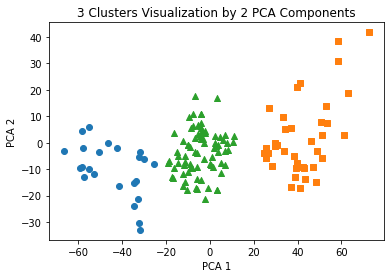

In [12]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = df[df['cluster'] == 0].index
marker1_ind = df[df['cluster'] == 1].index
marker2_ind = df[df['cluster'] == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x = df.loc[marker0_ind,'pca_x'],y = df.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = df.loc[marker1_ind,'pca_x'],y = df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = df.loc[marker2_ind,'pca_x'],y = df.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

#### 1.10 데이터를 이용한 군집 평가

In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#### 1.11 1.5와 1.7의 코드를 바탕으로 데이터셋의 모든 개별 데이터에 실루엣 계수 값을 구해주세요.

In [14]:
# 모든 개별 데이터의 실루엣 계수 값 구하기
score_samples = silhouette_samples(df.iloc[:,0:5],df['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (200,)


#### 1.12 데이터셋 데이터프레임에 실루엣 계수 칼럼을 추가해주세요.

In [15]:
df['silhouette_coeff'] = score_samples

#### 1.13 모든 데이터의 평균 실루엣 계수값을 구하고 확인해주세요.

In [16]:
average_score = silhouette_score(df.iloc[:,0:5],df['cluster'])
print('메일 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

df.head()

메일 데이터셋 Silhouette Analysis Score:0.444


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,target,cluster,pca_x,pca_y,silhouette_coeff
0,19,15,39,0,1,39,0,-31.869381,-33.001079,0.113110
1,21,15,81,0,1,81,4,0.765592,-56.841935,0.695946
2,20,16,6,1,0,6,0,-57.407825,-13.126987,0.442292
3,23,16,77,1,0,77,4,-2.167187,-53.479276,0.701658
4,31,17,40,1,0,40,0,-32.173249,-30.389820,0.253912


#### 1.14 데이터셋의 군집 칼럼별로 groupby하여 실루엣 계수 칼럼의 평균값을 구해주세요.

In [17]:
df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.416018
1    0.532762
2    0.371383
3    0.426101
4    0.597604
Name: silhouette_coeff, dtype: float64

#### 1.15 Inertia와 Elbow를 구하는 코드입니다. 참고해주세요.

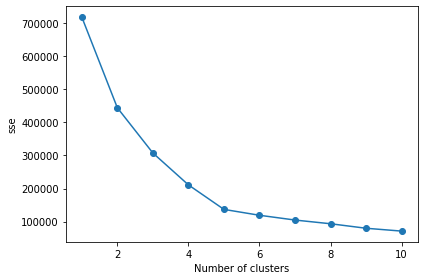

In [18]:
# 중심점 - 데이터 거리를 합산한 inertia(sse)를 빈 array로 생성
sse = []

# 반복문을 실행하며 군집의 개수가 1~11까지 kmeans를 실행 --> sse array에 추가
for i in range(1, 11) :
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(df)
    sse.append(km.inertia_)

# sse array 시각화   
plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.tight_layout()
plt.show()

- **질문**  
Cluster = 5를 엘보우로 생각하고, 이를 모델의 적정 클러스터 수로 지정하면 되는 건가요?

# **문제 2**

#### 2.1 데이터는 1의 데이터를 계속 활용합니다. 'Annual income'에 대한 'Spending Score'을 scatter plot으로 나타내주세요.

<Figure size 720x720 with 0 Axes>

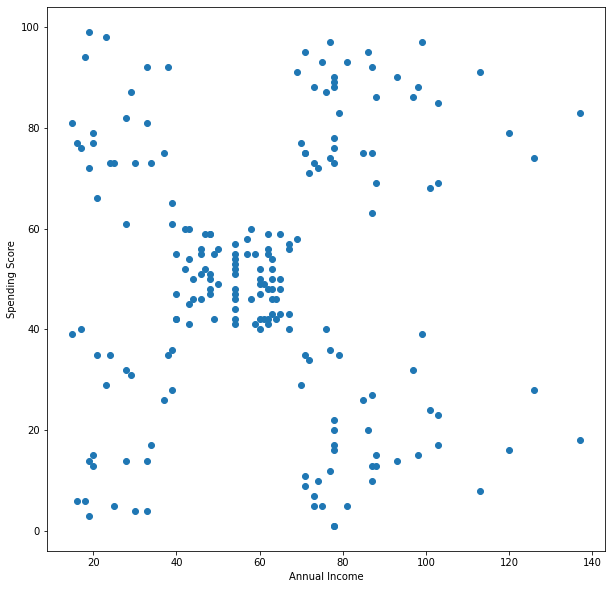

In [19]:
plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### 2.2 StandardScaler를 통해 정규화를 진행해주세요.

In [20]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,target,cluster,pca_x,pca_y,silhouette_coeff
0,19,15,39,0,1,39,0,-31.869381,-33.001079,0.113110
1,21,15,81,0,1,81,4,0.765592,-56.841935,0.695946
2,20,16,6,1,0,6,0,-57.407825,-13.126987,0.442292
3,23,16,77,1,0,77,4,-2.167187,-53.479276,0.701658
4,31,17,40,1,0,40,0,-32.173249,-30.389820,0.253912


In [21]:
from sklearn.preprocessing import StandardScaler

X_features = df.iloc[:,:5]

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(X_features), columns=X_features.columns)
df_std.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


**📌 질문**
- StandardScaler의 경우 수치형 데이터에 대해서만 적용하는 것이 일반적인데, 이때 Spending Score(1-100) 컬럼은 수치형 변수인가요, 범주형 변수인가요?
- 또한, StandardScaler를 적용할 때 수치형 변수에만 적용하는 건가요, 아니면 모든 변수들에 대해 적용 후 다음 단계들이 진행되는 건가요?  

※ 일단은 모든 변수들에 대해 StandardScaler를 적용한 후 진행하였습니다.

#### 2.3 최적 대역폭을 구하여 평균 이동 군집화를 진행해주세요. 최적 bandwidth와 cluster label 유형을 출력해주세요. (인자 : df_std)

In [23]:
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift

h = estimate_bandwidth(df_std)
print('bandwidth 값:', round(h,3))

bandwidth 값: 2.461


In [24]:
ms = MeanShift(bandwidth = h)
cluster_labels = ms.fit_predict(df_std)
print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1]


#### 2.4 target 변수를 'Spending Score'로 설정하여 결과를 확인하려고 합니다. 다음 코드의 빈칸을 채워주세요.

In [25]:
df_std['target'] = df_std['Spending Score (1-100)']
df_std['cluster']= cluster_labels
result = df_std.groupby(['target','cluster'])['Annual Income (k$)'].count()
print(result)

target     cluster
-1.910021  1          2
-1.832378  1          1
-1.793556  1          2
-1.754735  0          2
           1          2
                     ..
 1.739206  0          1
           1          1
 1.816849  1          2
 1.855671  0          1
 1.894492  0          1
Name: Annual Income (k$), Length: 120, dtype: int64


#### 2.5 2차원으로 축소하여 시각화를 진행하려고 합니다. 다음 코드의 빈칸을 채워주세요.

In [32]:
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df_std)

df_std['pca_x'] = pca_transformed[:,0]
df_std['pca_y'] = pca_transformed[:,1]
df_std.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,target,cluster,pca_x,pca_y
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152,-0.434801,1,1.258611,0.860834
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152,1.195704,1,-0.015669,2.526255
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405,-1.715913,0,-0.064165,-2.351214
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405,1.040418,0,-2.224975,0.471486
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405,-0.395980,0,-0.929885,-1.181543


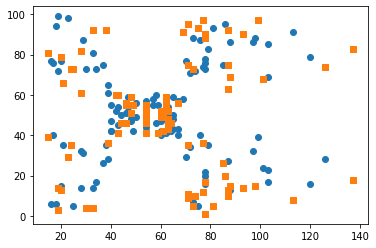

In [33]:
m0_ind = df_std[df_std['cluster'] == 0].index
m1_ind = df_std[df_std['cluster'] == 1].index


plt.scatter(x=df.loc[m0_ind,'Annual Income (k$)'], y=df.loc[m0_ind,'Spending Score (1-100)'],marker='o')
plt.scatter(x=df.loc[m1_ind,'Annual Income (k$)'], y=df.loc[m1_ind,'Spending Score (1-100)'],marker='s')

plt.show()

- 문제에서 m0_ind, m1_ind가 무엇을 의미하는 건가요?
- 어떠한 데이터를 2차원으로 차원축소하는건지 잘 모르겠어요.  
(원본 데이터/ 정규화 된 데이터)
- 시각화 할 때 딱히 차원축소를 진행하지 않고도 시각화가 가능할 것 같은데,  PCA를 적용하는 이유가 뭔가요?  
(문제 의도가 잘 이해가 안돼요..ㅠ)

#### 2.6 사이킷런 AgglomerativeClustering 클래스를 통해 병합군집을 진행해주세요. 클러스터 개수는 3으로, 병합 방식은 'ward'로 설정해주세요. cluster labels 유형을 출력해주세요.  (인자 : df)

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
agg = AgglomerativeClustering(n_clusters = 3,linkage = "ward")

cluster_labels = agg.fit_predict(df)
print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


#### 2.7 덴드로그램을 그려주세요.

In [38]:
from scipy.cluster.hierarchy import dendrogram, ward

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [17.5, 17.5, 78.125, 78.125],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [132.5, 132.5, 171.25, 171.25],
  [47.8125, 47.8125, 151.875, 151.875],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [312.5, 312.5, 342.5, 342.5],
  [282.5, 282.5, 327

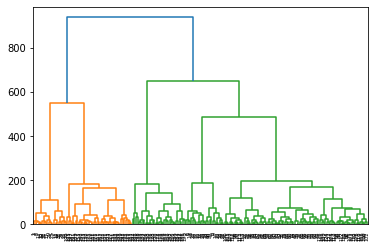

In [39]:
linkage_array = ward(df)
dendrogram(linkage_array)

#### 2.8 다시 데이터를 로드하고 다음 코드를 실행해주세요.

In [40]:
# 데이터 다시 로드

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron 3기_DS/data/Week11/Mall_Customers.csv')

df.drop('CustomerID',axis = 1,inplace = True)

df = pd.get_dummies(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


#### 2.9 AIC, BIC를 구하여 n_components 값을 결정하려고 합니다. 다음 코드의 빈칸을 채워주세요.

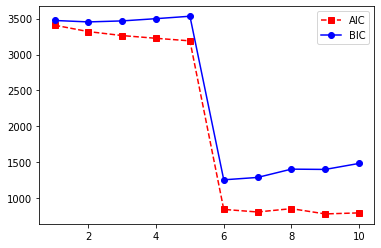

In [41]:
# AIC, BIC

from sklearn.mixture import GaussianMixture

gmm_per_k = [GaussianMixture(n_components = k, n_init = 10, random_state = 0).fit(df) for k in range(1,11)]

bics = [model.bic(df) for model in gmm_per_k]  # model 별 bic 구하기
aics = [model.aic(df) for model in gmm_per_k]  # model 별 aic 구하기

plt.plot(range(1,11), aics, 'rs--')
plt.plot(range(1,11), bics, 'bo-')
plt.legend(['AIC','BIC'])
plt.show()

- AIC, BIC가 가장 작아지는 k 선택 -> k = 6 선택

#### 2.10 GMM 군집화를 진행해주세요. 위의 결과를 참고하여 n_components를 결정해주세요. 이후 군집화 결과를 확인하기 위한 코드에서 빈칸을 채워주세요. (인자 : df) 

In [42]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 6,random_state = 0).fit(df)
gmm_cluster_labels = gmm.predict(df)

In [43]:
df['gmm_cluster'] = gmm_cluster_labels
df['target'] = df['Spending Score (1-100)']

result = df.groupby(['target'])['gmm_cluster'].value_counts()
print(result)

target  gmm_cluster
1       0              2
3       2              1
4       2              2
5       0              3
        2              1
                      ..
94      3              1
95      4              2
97      4              2
98      3              1
99      3              1
Name: gmm_cluster, Length: 121, dtype: int64


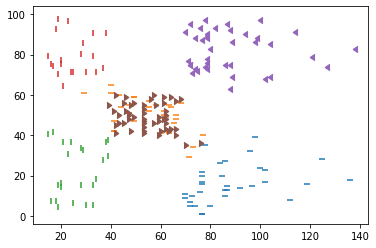

In [44]:
for i in range(0,6):
  m_ind = df[df['gmm_cluster'] == i].index
  plt.scatter(x=df.loc[m_ind,'Annual Income (k$)'], y=df.loc[m_ind,'Spending Score (1-100)'],marker=i)

plt.show()

# **문제3**

### **3.1**

(1) 앞에서 사용한 Mall_Customers 데이터를 다시 사용하겠습니다. 아래 코드를 불러주세요.

In [45]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Euron 3기_DS/data/Week11/Mall_Customers.csv")
df = df.drop('CustomerID', axis=1)
df = pd.get_dummies(df)

In [46]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


(2) 보다 용이한 시각화를 위해 "Annual Income (k$)", "Spending Score (1-100)" 열들만 사용하여 2개의 feature에 대한 고객 군집화를 진행하겠습니다. 그러기 위해 빈칸(<?>)을 채워주세요.

In [47]:
data = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


(3) DBSCAN 군집화를 실행하기 전, 위에서 만든 data에 대한 정규화를 위해 빈칸(<?>)을 채워주세요.

In [48]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
data_scale = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)
data_scale.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


(4) DBSCAN 클래스를 이용해 위에서 생성한 데이터를 군집화하기 위해 빈칸(<?>)을 채워주세요.(eps = 0.4, min_samples=5, metric="euclidean")

In [53]:
from sklearn.cluster import DBSCAN

In [59]:
dbscan = DBSCAN(eps = 0.4, min_samples=5, metric="euclidean")
dbscan_labels = dbscan.fit_predict(data_scale)
data_scale["cluster"] = dbscan_labels
print(np.unique(dbscan_labels))

[-1  0  1  2  3]


In [60]:
data_scale.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0


(5) 위에서 진행한 군집화의 결과를 시각화하겠습니다. 빈칸(<?>)을 채워주세요.

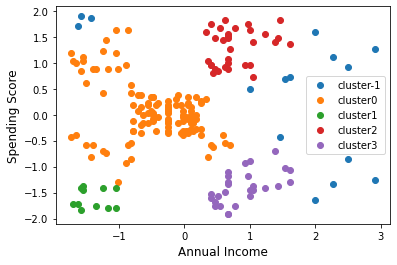

In [63]:
for i in range(-1,4):
    plt.scatter(data_scale.loc[data_scale["cluster"]==i, "Annual Income (k$)"],
               data_scale.loc[data_scale["cluster"]==i,"Spending Score (1-100)"],
                label = "cluster" + str(i))
    
plt.legend()
plt.xlabel("Annual Income", size=12)
plt.ylabel("Spending Score",size=12)
plt.show()

(6) cluster의 값이 -1인 경우가 존재하는 것을 확인할 수 있습니다. 해당 값은 무엇을 의미하는지 작성해주세요.

[답안]: 잡음 포인트(Noise Point)  
- 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인
트도 이웃 포인트로 가지고 있지 않는 경우
- 군집 레이블 상에서 -1로 표시

### **3.2**

(1) 위에서 만든 df 데이터셋을 이용하겠습니다. BayesianGaussianMixture를 사용하여 베이지안 가우시안 모델을 이용한 군집화를 진행하기 위해 빈칸(<?>)을 채워주세요.(n_components=10, n_init=10)

In [64]:
from sklearn.mixture import BayesianGaussianMixture

In [65]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(df)

BayesianGaussianMixture(n_components=10, n_init=10)

(2) 몇 개의 컴포넌트가 필요한지 알아내는 코드를 작성해주세요.

In [67]:
n_clusters_ = (np.round(bgm.weights_,2)>0).sum()
n_clusters_

8

- 8개의 component가 필요하다.